In [1]:
import yfinance as yf
import datetime
import pandas as pd
from pandas_datareader import data as web
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy as np
import matplotlib.pyplot as plt

In [42]:
tick = input()

GOOGL


In [43]:
y_ds = yf.download(tickers=tick,start='2013-01-02', end='2018-12-28')

[*********************100%***********************]  1 of 1 completed


In [44]:
y_test = pd.Series(yf.download(tickers=tick,start='2019-01-02', end='2019-06-01',)['Adj Close'])

[*********************100%***********************]  1 of 1 completed


In [45]:
trace1 = {
    'x': y_ds.index,
    'open': y_ds.Open,
    'close': y_ds.Close,
    'high': y_ds.High,
    'low': y_ds.Low,
    'type': 'candlestick',
    'name': tick,
    'showlegend': True
}

In [46]:
data = [trace1]
layout = go.Layout({
    'title': {
        'text': tick,
        'font': {
            'size': 15
        }
    }
})

In [47]:
fig = go.Figure()
fig.add_trace(trace1)
fig.update_layout(layout)
fig.show()

The data clearly shows that there is no seasonality, but there may be a relative trend. 

In [48]:
y_fit = pd.Series(y_ds['Adj Close'])
figadj = px.line(y_fit)
figadj.show()

## Single Exponential Smoothing

Here we will create three models in which we will consider three different 𝜶 values.

In [49]:
y_fit.index = pd.DatetimeIndex(y_fit.index).to_period('M')

𝜶 = 0.2

In [50]:
ins1 = SimpleExpSmoothing(y_fit, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(6).rename(r'$\alpha=0.2$')

𝜶 = 0.8

In [51]:
ins2 = SimpleExpSmoothing(y_fit, initialization_method="heuristic").fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(6).rename(r'$\alpha=0.8$')

𝜶 value automatically optimized by statsmodel

In [52]:
ins3 = SimpleExpSmoothing(y_fit, initialization_method="estimated").fit()
ins_cast3 = ins3.forecast(6).rename(r'$\alpha=%s$'%ins3.model.params['smoothing_level'])

In [53]:
ins_cast1.index = ins_cast1.index.to_timestamp()
ins_cast1 *= (y_fit[-1]/ins_cast1[0])
ins_cast2.index = ins_cast2.index.to_timestamp()
ins_cast2 *= (y_fit[-1]/ins_cast2[0])
ins_cast3.index = ins_cast3.index.to_timestamp()
ins_cast3 *= (y_fit[-1]/ins_cast3[0])

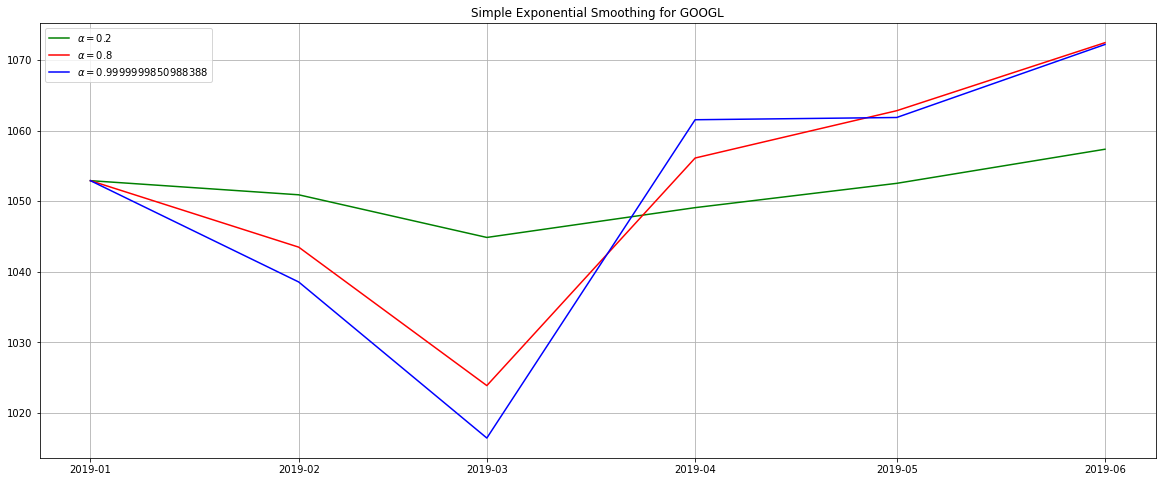

In [54]:
plt.figure(figsize=(20, 8))
plt.grid(True)
plt.title("Simple Exponential Smoothing for "+tick)
plt.plot(ins_cast1, color='green', label=r'$\alpha=%s$0.2')
plt.plot(ins_cast2, color='red', label=r'$\alpha=%s$0.8')
plt.plot(ins_cast3, color='blue', label = r'$\alpha=%s$'%ins3.model.params['smoothing_level'])
plt.legend()

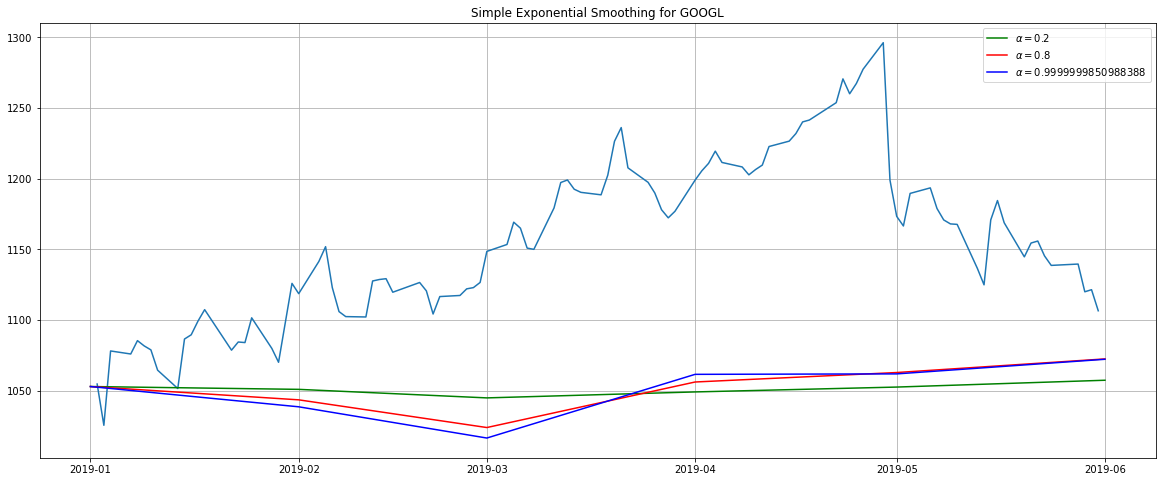

In [55]:
plt.figure(figsize=(20, 8))
plt.grid(True)
plt.title("Simple Exponential Smoothing for "+tick)
plt.plot(y_test)
plt.plot(ins_cast1, color='green', label=r'$\alpha=%s$0.2')
plt.plot(ins_cast2, color='red', label=r'$\alpha=%s$0.8')
plt.plot(ins_cast3, color='blue', label = r'$\alpha=%s$'%ins3.model.params['smoothing_level'])
plt.legend()

## Double Exponential Smoothing

This method is used when the data shows a particular trend like an upward or a downward slope.

Lets take a look at another example. This time we use air pollution data and the Holt’s Method. We will fit three examples again. 1. In fit1 we again choose not to use the optimizer and provide explicit values for 𝛼=0.8 and 𝛽=0.2 2. In fit2 we do the same as in fit1 but choose to use an exponential model rather than a Holt’s additive model. 3. In fit3 we used a damped versions of the Holt’s additive model but allow the dampening parameter 𝜙 to be optimized while fixing the values for 𝛼=0.8 and 𝛽=0.2

In [56]:
Holt_fit1 = Holt(y_fit, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
Holt_fcast1 = Holt_fit1.forecast(6).rename("Holt's linear trend")
Holt_fit2 = Holt(y_fit, exponential=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
Holt_fcast2 = Holt_fit2.forecast(6).rename("Exponential trend")
Holt_fit3 = Holt(y_fit, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
Holt_fcast3 = Holt_fit3.forecast(6).rename("Additive damped trend")

In [57]:
Holt_fcast3

2019-01    396.413460
2019-02    392.313832
2019-03    383.739632
2019-04    398.025386
2019-05    401.087839
2019-06    405.013876
Freq: M, Name: Additive damped trend, dtype: float64

In [58]:
Holt_fcast1.index = Holt_fcast1.index.to_timestamp()
Holt_fcast1 *= (y_fit[-1]/Holt_fcast1[0])
Holt_fcast2.index = Holt_fcast2.index.to_timestamp()
Holt_fcast2 *= (y_fit[-1]/Holt_fcast2[0])
Holt_fcast3.index = Holt_fcast3.index.to_timestamp()
Holt_fcast3 *= (y_fit[-1]/Holt_fcast3[0])

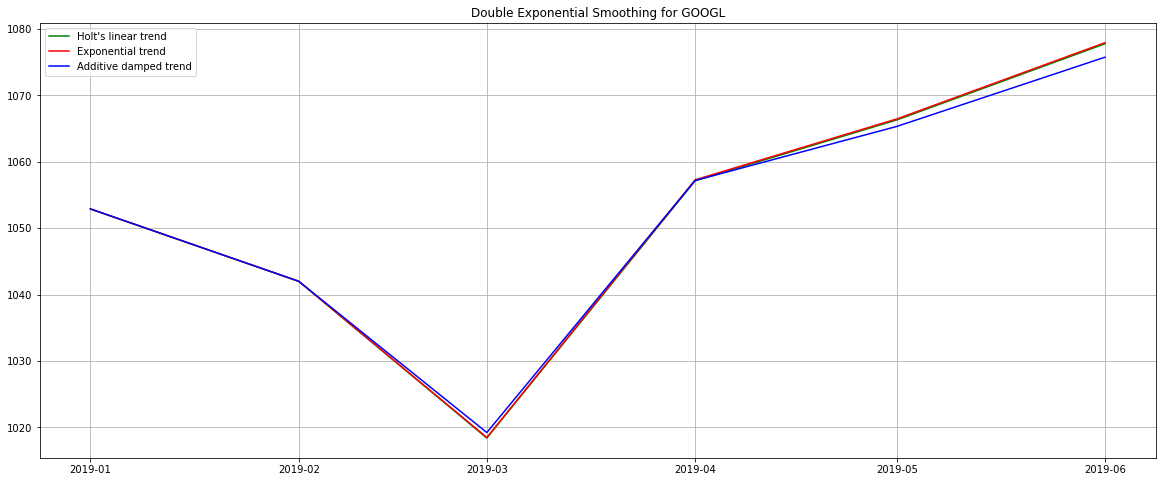

In [59]:
plt.figure(figsize=(20, 8))
plt.grid(True)
plt.title("Double Exponential Smoothing for " + tick)
plt.plot(Holt_fcast1, color='green', label="Holt's linear trend")
plt.plot(Holt_fcast2, color='red', label="Exponential trend")
plt.plot(Holt_fcast3, color='blue', label ="Additive damped trend")
plt.legend()

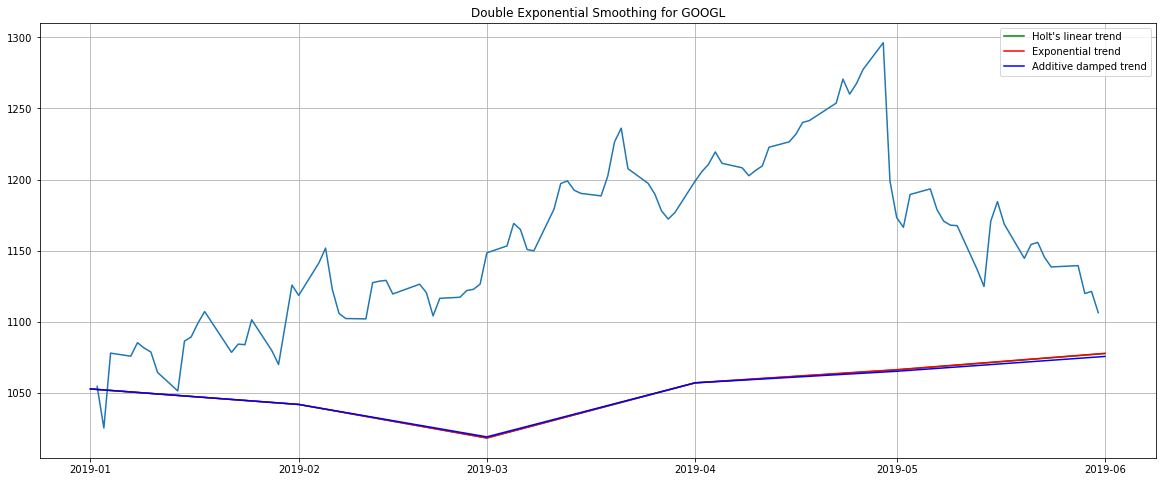

In [60]:
plt.figure(figsize=(20, 8))
plt.grid(True)
plt.title("Double Exponential Smoothing for " + tick)
plt.plot(y_test)
plt.plot(Holt_fcast1, color='green', label="Holt's linear trend")
plt.plot(Holt_fcast2, color='red', label="Exponential trend")
plt.plot(Holt_fcast3, color='blue', label ="Additive damped trend")
plt.legend()